In [1]:
from IPython.display import IFrame

IFrame(
    "https://matplotlib.org/gallery.html#lines_bars_and_markers",
    width="100%",
    height=500,
)

In [2]:
import matplotlib

print(matplotlib.__version__)
print(matplotlib.get_backend())

3.1.2
module://ipykernel.pylab.backend_inline


In [3]:
%matplotlib inline

# Getting Started 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import sys
sys.path.append("..")

In [6]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [7]:
plt.show()

## Axes 

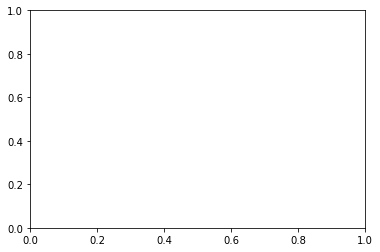

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.show()

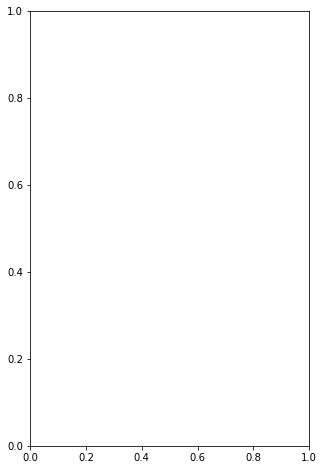

In [9]:
fig = plt.figure(figsize=(5, 8))
ax = fig.add_subplot(111)
plt.show()

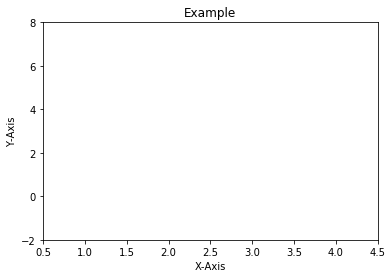

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([0.5, 4.5])
ax.set_ylim([-2 , 8])
ax.set_title("Example")
ax.set_xlabel("X-Axis")
ax.set_ylabel("Y-Axis")
plt.show()

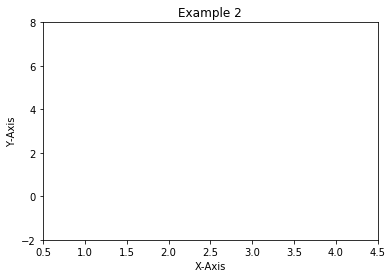

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(
    xlim=[0.5, 4.5],
    ylim=[-2, 8],
    title="Example 2",
    xlabel="X-Axis",
    ylabel="Y-Axis"
)
plt.show()

# Basic Plotting 

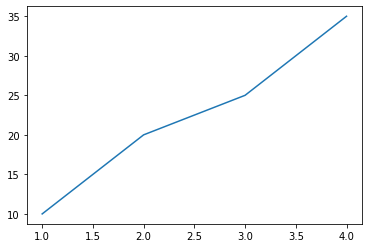

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 35])
plt.show()

## simple approach 

<function matplotlib.pyplot.show(*args, **kw)>

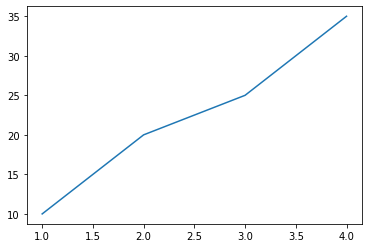

In [13]:
plt.figure()
plt.plot([1, 2, 3, 4], [10, 20, 25, 35])
plt.show

## Multiple Axes

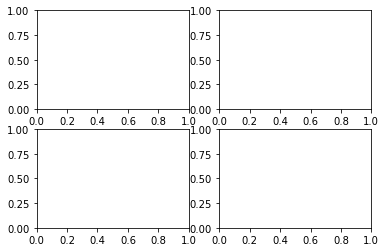

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.show()

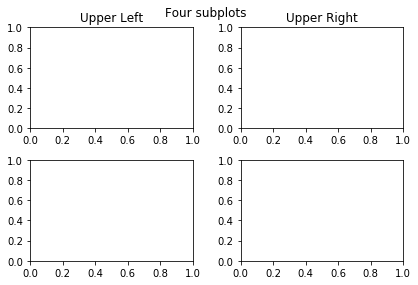

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0, 0].set(title="Upper Left")
axes[0, 1].set_title("Upper Right")

#tight_layout makes sure titles and tick labels don't overlap
fig.tight_layout()
fig.suptitle("Four subplots")

plt.show()

# Input Data: 1D Series 

## Bar Plots 

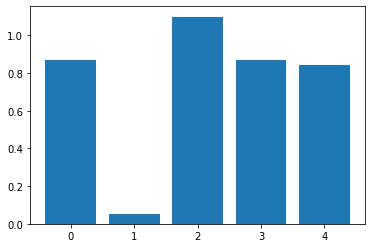

In [17]:
np.random.seed(2)
x = np.arange(5)
y = np.random.random(5) * 2

fig, ax = plt.subplots()
ax.bar(x, y)
plt.show()

In [18]:
x

array([0, 1, 2, 3, 4])

In [19]:
y

array([0.8719898 , 0.05185246, 1.09932496, 0.87064479, 0.8407356 ])

Adding errorbars...

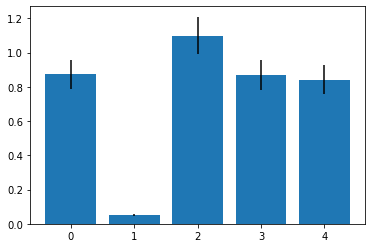

In [20]:
np.random.seed(2)
x = np.arange(5)
y = np.random.random(5)  * 2
error = y * 0.1
fig, ax = plt.subplots()
ax.bar(x, y, yerr=error)
plt.show()

If we have negative values, we can use axhline to draw an axis "spine" to mark the zero line.

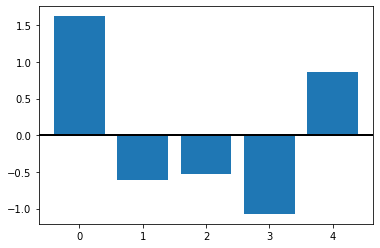

In [22]:
np.random.seed(1)
x = np.arange(5)
y = np.random.randn(5)

fig, ax = plt.subplots()
ax.bar(x, y)
ax.axhline(y=0, color='black', linewidth=2)
plt.show()

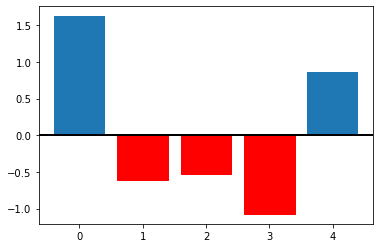

In [23]:
fig, ax = plt.subplots()
vert_bars = ax.bar(x, y) #store the output of .bar call

for bar, height in zip(vert_bars, y):
    if height < 0:
        bar.set(color='red')
        
ax.axhline(y=0, color='black', linewidth=2)

plt.show()

In [24]:
for bar in vert_bars:
    print(bar)

Rectangle(xy=(-0.4, 0), width=0.8, height=1.62435, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=-0.611756, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=-0.528172, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=-1.07297, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=0.865408, angle=0)


## Filled Regions 

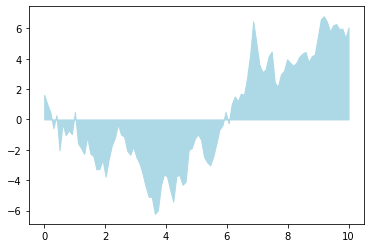

In [26]:
np.random.seed(1)
y = np.random.randn(100).cumsum()
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
ax.fill_between(x, y, color='lightblue')
plt.show()

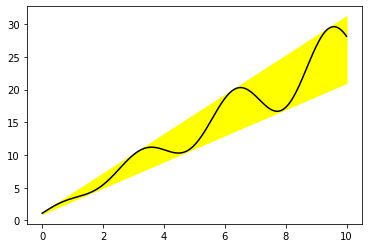

In [27]:
x = np.linspace(0, 10, 200)
y1 = 2 * x + 1
y2 = 3 * x + 1.2
y_mean = 0.5 * x * np.cos(2*x) + 2.5 * x + 1.1

fig, ax = plt.subplots()

#plot the envelope with 'fill_between'
ax.fill_between(x, y1, y2, color='yellow')

#plot the centerline with plot
ax.plot(x, y_mean, color='black')

plt.show()

### data keyword argument 

When using specialized data structures such as Pandas DataFrame and XArray, the input data to be plotted are accessed like dictionary elements. This can get very repetitive and tedious as one types out a plotting command accessing those elements. So, the data keyword argument was added to many of the plotting functions in v1.5. With this feature, one can pass in a single dictionary-like object as data, and use the string key names in the place of the usual input data arguments.
Let's revisit the above example:

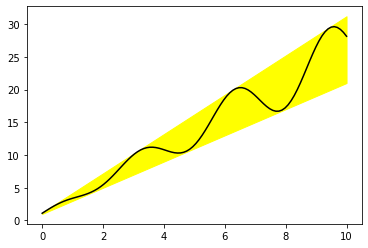

In [30]:
x = np.linspace(0, 10, 100)
data_obj = {
    "x": x,
    "y1": 2 * x +1,
    "y2": 3 * x + 1.2,
    "mean": 0.5 * x * np.cos(2 * x) + 2.5 * x +1.1
}

fig, ax = plt.subplots()

#plot the envelope with 'fill_between'
ax.fill_between("x", "y1", "y2", color='yellow', data=data_obj)

#plot the centerline with plot
ax.plot("x", "mean", color='black', data=data_obj)

plt.show()

# Input Data: 2D Arrays or Images 

In [31]:
arr_2d = np.arange(9).reshape((3, 3))
arr_2d

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

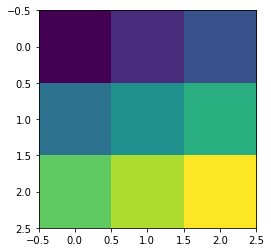

In [32]:
fig, ax = plt.subplots()
ax.imshow(arr_2d)
plt.show()

imshow is used most of the times to display images.

For visualizing matrices, matshow provides better defaults, e.g. axis labelling.

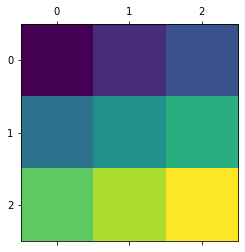

In [34]:
fig, ax = plt.subplots()
ax.matshow(arr_2d)
plt.show()

### Colorbars

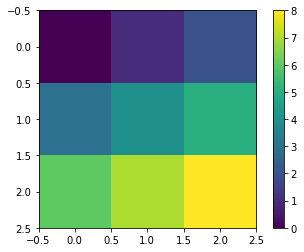

In [35]:
fig, ax = plt.subplots()
im = ax.imshow(arr_2d)
fig.colorbar(im)
plt.show()

In [36]:
arr_2d

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

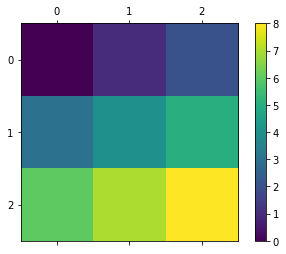

In [37]:
fig, ax = plt.subplots()
im = ax.matshow(arr_2d)
fig.colorbar(im)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

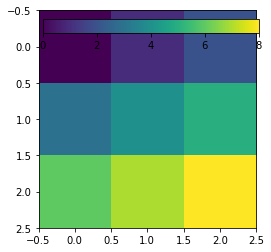

In [38]:
fig, ax = plt.subplots()
cax = fig.add_axes([0.27, 0.8, 0.5, 0.05])

im = ax.imshow(arr_2d)
fig.colorbar(im, cax=cax, orientation='horizontal')
plt.show